#  Music document visualization-(wav type of documents)

## There is a type of sound document that use to save the music which is wav document, this kind of document can save the high quality of the music and also widely using in daily lift to play music. From the learning of the library of wave, the wav document have the data of number of channels, sampling frequency and quantified bits, which I can use to make a visualizatin graft.

### The first stap, using library of wave to grasp the sound data into notebook and making the basic graft of the sound wave 

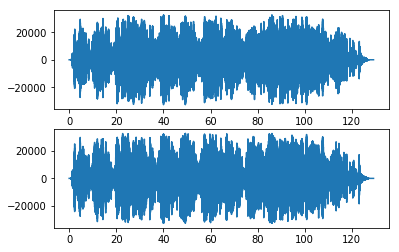

In [2]:
import wave as we
import numpy as np
import matplotlib.pyplot as plt

def wavread():
    #get the wav data resources when you do that you can change the path to different data documents
    wavfile =  we.open('C:/Users/PC-zhan/Desktop/kivi data resources',"rb")
    params = wavfile.getparams()
    framesra,frameswav= params[2],params[3]
    datawav = wavfile.readframes(frameswav)
    wavfile.close()   
    datause = np.fromstring(datawav,dtype = np.short)
    datause.shape = -1,2
    datause = datause.T
    time = np.arange(0, frameswav) * (1.0/framesra)
    return datause,time

def pltdraw():
    wavdata,wavtime = wavread()
    plt.subplot(211)
    plt.plot(wavtime, wavdata[0])
    plt.subplot(212)
    plt.plot(wavtime, wavdata[1])
    plt.show()
    
pltdraw()


### From this part we can see there are millions of the data in the list, which makes it hard to generat the graft because the high quality of the document.

In [3]:
wavdata,wavtime = wavread()
print(wavdata)
print(wavtime)
#len(wavdata[1])
len(wavtime)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[  0.00000000e+00   2.26757370e-05   4.53514739e-05 ...,   1.29199932e+02
   1.29199955e+02   1.29199977e+02]


5697720

### I used the new list to get the new info of the document by grasping the data Intermittently.


In [4]:
from pandas import Series, DataFrame
import pandas as pd
wavdata,wavtime = wavread()

wavdatalist0 = list(wavdata[0])
wavdatalist00 = list(wavdata[1])
wavdatalist1 = list(wavtime)
lengthoflist = len(wavdatalist0)

list0 = []
list00 = []
list1 = []
def creatlist0():
    i = 0
    for i in range(1000):
        i = i * 10000
        if i < lengthoflist:    
            a = wavdatalist0[i]
            list0.append(a)
        else:
            break
creatlist0()

def creatlist00():
    c = 0
    for c in range(1000):
        c = c * 10000
        if c < lengthoflist:    
            a = wavdatalist00[c]
            list00.append(a)
        else:
            break
creatlist00()

def creatlist1():
    b = 0
    for b in range(1000):
        b = b * 10000
        if b < lengthoflist:    
            a = wavdatalist1[b]
            list1.append(a)
        else:
            break
creatlist1()


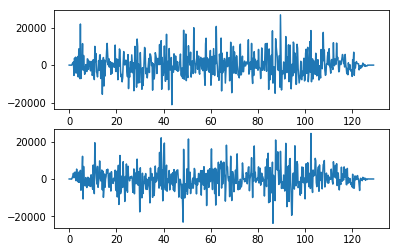

In [5]:
plt.subplot(211)
plt.plot(list1, list0)
plt.subplot(212)
plt.plot(list1, list00)
plt.show()

In [6]:
wavtime1 = np.array(list1)
wavdata0 = np.array(list0)
wavdata00 = np.array(list00)

G:\Anaconda\lib\site-packages\matplotlib\transforms.py:2786: RuntimeWarning: overflow encountered in short_scalars
  elif vmax - vmin <= maxabsvalue * tiny:


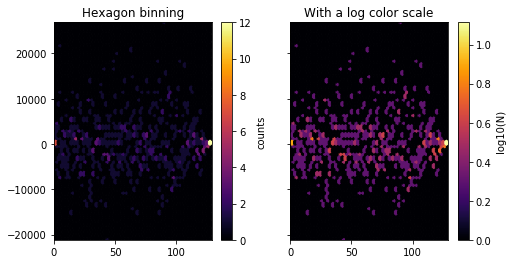

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Fixing random state for reproducibility
np.random.seed(19680801)

n = 100000
x = wavtime1
y = wavdata0
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

G:\Anaconda\lib\site-packages\matplotlib\mlab.py:1895: RuntimeWarning: overflow encountered in exp
  return np.exp(-z/(2*(1-rho**2))) / denom
G:\Anaconda\lib\site-packages\matplotlib\transforms.py:2786: RuntimeWarning: overflow encountered in short_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
G:\Anaconda\lib\site-packages\matplotlib\colors.py:491: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
G:\Anaconda\lib\site-packages\matplotlib\colors.py:861: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
G:\Anaconda\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


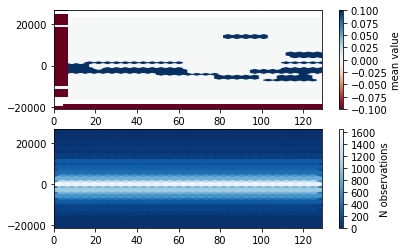

In [10]:
delta = 0.025
x = wavtime1
y = wavdata0
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = Z2 - Z1  # difference of Gaussians

x = X.ravel()
y = Y.ravel()
z = Z.ravel()

# make some points 20 times more common than others, but same mean
xcond = (-1 < x) & (x < 1)
ycond = (-2 < y) & (y < 0)
cond = xcond & ycond
xnew = x[cond]
ynew = y[cond]
znew = z[cond]
for i in range(20):
    x = np.hstack((x, xnew))
    y = np.hstack((y, ynew))
    z = np.hstack((z, znew))

xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

gridsize = 30

fig, (ax0, ax1) = plt.subplots(2, 1)

c = ax0.hexbin(x, y, C=z, gridsize=gridsize, marginals=True, cmap=plt.cm.RdBu,
               vmax=abs(z).max(), vmin=-abs(z).max())
ax0.axis([xmin, xmax, ymin, ymax])
cb = fig.colorbar(c, ax=ax0)
cb.set_label('mean value')

c = ax1.hexbin(x, y, gridsize=gridsize, cmap=plt.cm.Blues_r)
ax1.axis([xmin, xmax, ymin, ymax])
cb = fig.colorbar(c, ax=ax1)
cb.set_label('N observations')

plt.show()

In [39]:
import numpy as np
from bokeh.plotting import figure, output_file, show
N = 400
x = wavtime1 * 300
y = wavdata0

radii = np.random.random(size=N) * 1000
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(0.4*a, 0.4*a)
]
output_file("wavdata color", title="wavdata color", mode="cdn")
TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"
p = figure(tools=TOOLS, x_range=(0,100), y_range=(0,100))
p.circle(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
show(p)

G:\Anaconda\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: ResizeTool is removed in Bokeh 0.12.7, adding it is a no-op. In the future, accessing ResizeTool will be an error
  warn(message)
G:\Anaconda\lib\site-packages\bokeh\models\sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('radius', 400), ('x', 570)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
G:\Anaconda\lib\site-packages\bokeh\models\sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('radius', 400), ('x', 570), ('y', 570)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
G:\Anaconda\lib\site-packages\bokeh\models\sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 570), ('radius', 400), ('x', 570), ('y', 

![kivi image](https://raw.githubusercontent.com/mmeagher/ARC6818-2017/master/images/kivi%20picture.jpg 'kivi')